# lightboost feature importance ranking

In [1]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import lightgbm
# %matplotlib
###########wrapping root mean square error for later calls##########
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
###########loading data##########
fdata=pd.read_csv('database.csv',encoding="gbk")
raw_data=fdata.loc[:,[
                      'Zn Content wt.',#0
                      'Mn Cotent wt.',#1
                      'Co Cotent wt.',#2
                      'Cr Content wt.',#3
                      'Fe Cotent wt.(ICP for metal)',#4
                      'N Content at.',#5
                      'O Content at.',#6
                      'S Content at.',#7
                      'pyridinic species',#8
                      'pyrrolic species',#9
                      'graphitic species',#10
                      'oxidized species',#11
                      'Raman',#12
                      'BET Surface Area m2/g',#13  
                      'Micropore ratio',#14
                      'Mesopore ratio',#15
                      'catalyst loading on RDE/RRDE(mg/cm2)',#16
                      'qualified'#the classification target
                        ]]
###########handling missing values##########
median_raw_data=raw_data.median()
dict_median_raw_data=median_raw_data.to_dict()
data=raw_data.fillna(dict_median_raw_data)
###########train test splitting##########
raw_param=data.iloc[:,0:17]
raw_power=data.iloc[:,17]
X=raw_param.values.astype(np.float32)
y=raw_power.values.astype(np.float32)
###########fix random seed for reproducability##########
seed=320
###########splitting training and testing sets##########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,random_state=seed)
###########defining the classifier##########
model_lgbm=lightgbm.LGBMClassifier()
model_lgbm.fit(X_train,y_train)
###########generating confusion matrix to evaluate the prediction accuracy##########
prediction_train=model_lgbm.predict(X_train)
prediction_test=model_lgbm.predict(X_test)
final_result=classification_report(y_test,prediction_test,output_dict=True)
low_MPD_precision=final_result['0.0']['precision']
high_MPD_precision=final_result['1.0']['precision']
print(classification_report(y_train,prediction_train))
print(classification_report(y_test,prediction_test))
###########evaluating and visualization of feature importances##########
print(model_lgbm.feature_importances_)
name_list=['Zn Content wt.',#0
              'Mn Cotent wt.',#1
              'Co Cotent wt.',#2
              'Cr Content wt.',#3
              'Fe Cotent wt.(ICP for metal)',#4
              'N Content at.',#5
              'O Content at.',#6
              'S Content at.',#7
              'pyridinic species',#8
              'pyrrolic species',#9
              'graphitic species',#10
              'oxidized species',#11
              'Raman',#12
              'BET Surface Area m2/g',#13  
              'Micropore ratio',#14
              'Mesopore ratio',#15
              'catalyst loading on RDE/RRDE(mg/cm2)'#16
          ]
plt.bar(range(len(model_lgbm.feature_importances_)), model_lgbm.feature_importances_,color='rgb',tick_label=name_list)
plt.xticks(rotation=90)
plt.show()


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        81
         1.0       0.94      1.00      0.97        15

    accuracy                           0.99        96
   macro avg       0.97      0.99      0.98        96
weighted avg       0.99      0.99      0.99        96

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        27
         1.0       1.00      0.40      0.57         5

    accuracy                           0.91        32
   macro avg       0.95      0.70      0.76        32
weighted avg       0.92      0.91      0.89        32

[16  0  0  0 68 27 20  0 40  7  8 13  0 34  3 15 51]


<Figure size 640x480 with 1 Axes>

# SHAP interpretable models

In [2]:
import shap
# model_lgbm是在第1节中训练的模型
# %matplotlib
explainer = shap.TreeExplainer(model_lgbm)
cols=[ 
              'Zn Content wt.',#0
              'Mn Cotent wt.',#1
              'Co Cotent wt.',#2
              'Cr Content wt.',#3
              'Fe Cotent wt.(ICP for metal)',#4
              'N Content at.',#5
              'O Content at.',#6
              'S Content at.',#7
              'pyridinic species',#8
              'pyrrolic species',#9
              'graphitic species',#10
              'oxidized species',#11
              'Raman',#12
              'BET Surface Area m2/g',#13  
              'Micropore ratio',#14
              'Mesopore ratio',#15
              'catalyst loading on RDE/RRDE(mg/cm2)'#16
                        ]
shap_values = explainer.shap_values(raw_param)
print(type(shap_values))

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


<class 'list'>


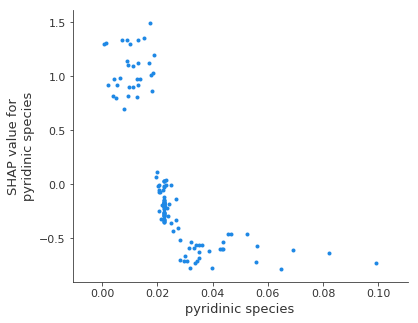

In [3]:
shap.dependence_plot('pyridinic species', shap_values[1], raw_param, interaction_index=None, show=False)

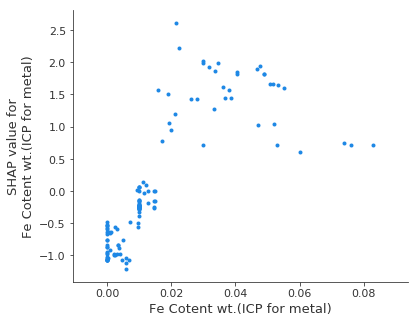

In [4]:
shap.dependence_plot('Fe Cotent wt.(ICP for metal)', shap_values[1], raw_param, interaction_index=None, show=False)

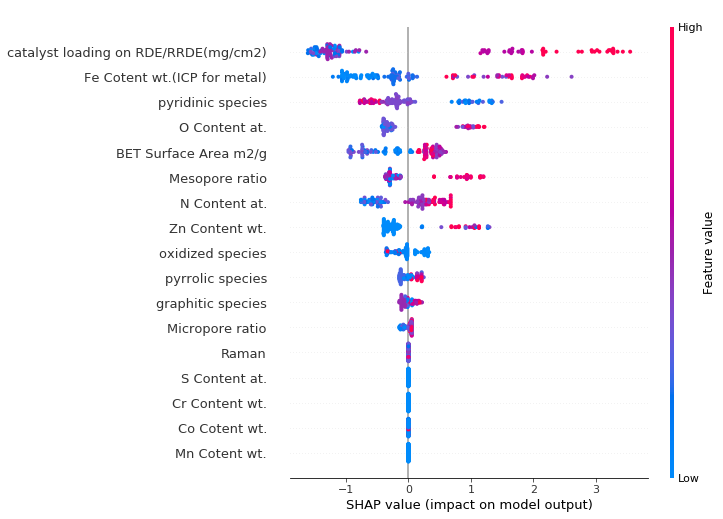

In [5]:
shap.summary_plot(shap_values[1], raw_param)